How to determine the credit scores is a common risk control process in the financial industry. Based on the scores, the bank is able to decide whether to issue a credit card or not. It will directly affect the profit for the bank. If we are able to raise the accuracy of identifying the applicants who have the lowest risk, we can help the bank make more money and control the risk in the future.

We'd like to build machine learning models to predict the credit scores for the bank.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OrdinalEncoder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import util

# 1. Pre-model Analysis

In [9]:
# load data
df1 = pd.read_csv('./data/application_record.csv')
df2 = pd.read_csv('./data/credit_record.csv')

In [5]:
util.data_info(df1)

----------Information of the data----------
Number of Rows: 438557    Number of Columns: 18
Column names:
Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
Missing value information:
OCCUPATION_TYPE:  the number of missing values is 134203


In [6]:
util.data_info(df2)

----------Information of the data----------
Number of Rows: 1048575    Number of Columns: 3
Column names:
Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
Missing value information:


- if have time, can try to plot the distribution of each column

# 2. Feature Engineering

- Feature selection: 'car', 'property', 'number of a children', 'annual income', 'income category', 'education level', 'martial status', 'way of living', 'employment', 'mobile phone', 'work phone', 'phone', 'email', 'occupation', 'family size'

## Flag type variables
- Car: encode 'FLAG_OWN_CAR' from 'N', 'Y' to 0, 1
- Property: encode 'FLAG_OWN_REALTY' from 'N', 'Y' to 0, 1  
- Mobile phone: 'FLAG_MOBIL' 0, 1
- Work phone: 'FLAG_WORK_PHONE'  0, 1
- Phone: 'FLAG_PHONE' 0, 1
- Email: 'FLAG_EMAIL' 0, 1

In [10]:
ordinal = OrdinalEncoder(categories=[['N', 'Y']])
df1['car'] = ordinal.fit_transform(df1[['FLAG_OWN_CAR']])
df1['property'] = ordinal.fit_transform(df1[['FLAG_OWN_REALTY']])
df1 = df1.rename(columns={'FLAG_MOBIL': 'mobile',
                    'FLAG_WORK_PHONE': 'work_phone',
                    'FLAG_PHONE': 'phone',
                    'FLAG_EMAIL': 'email'})

## Category type
- Gender: 'CODE_GENDER'
- Education: 'NAME_EDUCATION_TYPE'
- Income type: 'NAME_INCOME_TYPE'
- Housing type: 'NAME_HOUSING_TYPE'
- Occupation type: 'OCCUPATION_TYPE'
- Marital status: 'NAME_FAMILY_STATUS'

- Gender: To avoid discrimination in gender, use one hot encoder. Drop one column since there are just two types. (female - male)

In [8]:
df1['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [11]:
df1 = pd.concat([df1, util.Dummy_Transformer('gender_').fit_transform(df1['CODE_GENDER'])], axis=1)
df1 = df1.rename(columns={'gender_F': 'gender'})

- Education: encode ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher','Higher education', 'Academic degree'] to [0, 1, 2, 3, 4]

In [7]:
df1['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [8]:
education_ordinal = OrdinalEncoder(
    categories=[['Lower secondary', 'Secondary / secondary special', 'Incomplete higher',
                 'Higher education', 'Academic degree']])
df1['education'] = education_ordinal.fit_transform(df1[['NAME_EDUCATION_TYPE']])

- Income type: one hot encoder

In [12]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [9]:
df1 = pd.concat([df1, util.Dummy_Transformer('income_').fit_transform(df1['NAME_INCOME_TYPE'])], axis=1)

- Housing type: one hot encoder

In [10]:
df1['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [11]:
df1 = pd.concat([df1, util.Dummy_Transformer('housing_').fit_transform(df1['NAME_HOUSING_TYPE'])], axis=1)

- Occupation type: one hot encoder

In [16]:
df1['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [12]:
# replace nan as 'others'
df1['OCCUPATION_TYPE'].fillna('others', inplace=True)

In [13]:
df1 = pd.concat([df1, util.Dummy_Transformer('occupation_').fit_transform(df1['OCCUPATION_TYPE'])], axis=1)

- Marital status: one hot encoder

In [19]:
df1['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [14]:
df1 = pd.concat([df1, util.Dummy_Transformer('marital_').fit_transform(df1['NAME_FAMILY_STATUS'])], axis=1)

## Numerical Variables
- Number of children: 'CNT_CHILDREN'
- Annual income: 'AMT_INCOME_TOTAL'
- Birthday: 'DAYS_BIRTH'
- Days of employment: 'DAYS_EMPLOYED'
- Family size: 'CNT_FAM_MEMBERS'

In [15]:
df1 = df1.rename(columns={'CNT_CHILDREN': 'num_children', 'AMT_INCOME_TOTAL': 'annual_income',
                          'DAYS_BIRTH': 'birthday', 'DAYS_EMPLOYED': 'days_employment',
                          'CNT_FAM_MEMBERS': 'family_size'})

In [22]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'num_children',
       'annual_income', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'birthday',
       'days_employment', 'mobile', 'work_phone', 'phone', 'email',
       'OCCUPATION_TYPE', 'family_size', 'car', 'property', 'gender_F',
       'gender_M', 'education', 'income_Commercial associate',
       'income_Pensioner', 'income_Student', 'income_State servant',
       'income_Working', 'housing_Municipal apartment',
       'housing_Office apartment', 'housing_Rented apartment',
       'housing_Co-op apartment', 'housing_House / apartment',
       'housing_With parents', 'occupation_Laborers', 'occupation_Core staff',
       'occupation_Realty agents', 'occupation_others',
       'occupation_Security staff', 'occupation_Secretaries',
       'occupation_Cleaning staff', 'occupation_Private service staff',
       'occupation_Accountants', 'occupation_Managers', 'occupation_H

- 'days_employment': change the positive value to 0  
Because the positive value means the person currently unemployed.

In [29]:
df1.loc[df1.days_employment > 0, 'days_employment'] = 0

## Feature analysis

In [31]:
numeric_features = ['num_children', 'annual_income', 'birthday', 'days_employment', 'family_size']
cat_ordinal_features = ['mobile', 'work_phone', 'phone', 'email', 'car', 'property', 'education']
cat_dummy_features = ['gender',
                      'income_Student', 'income_Pensioner', 'income_State servant',
                      'income_Commercial associate', 'income_Working',
                      'housing_Municipal apartment', 'housing_With parents',
                      'housing_Office apartment', 'housing_Rented apartment',
                      'housing_House / apartment', 'housing_Co-op apartment',
                      'occupation_Cleaning staff', 'occupation_others',
                      'occupation_Security staff', 'occupation_Medicine staff',
                      'occupation_Managers', 'occupation_Sales staff',
                      'occupation_Cooking staff', 'occupation_Core staff',
                      'occupation_Laborers', 'occupation_Low-skill Laborers',
                      'occupation_Waiters/barmen staff', 'occupation_IT staff',
                      'occupation_Accountants', 'occupation_Secretaries',
                      'occupation_High skill tech staff', 'occupation_Drivers',
                      'occupation_Realty agents', 'occupation_Private service staff',
                      'marital_Single / not married',
                      'marital_Married', 'marital_Civil marriage', 'marital_Separated', 'marital_Widow']

## Collinearity

<AxesSubplot:>

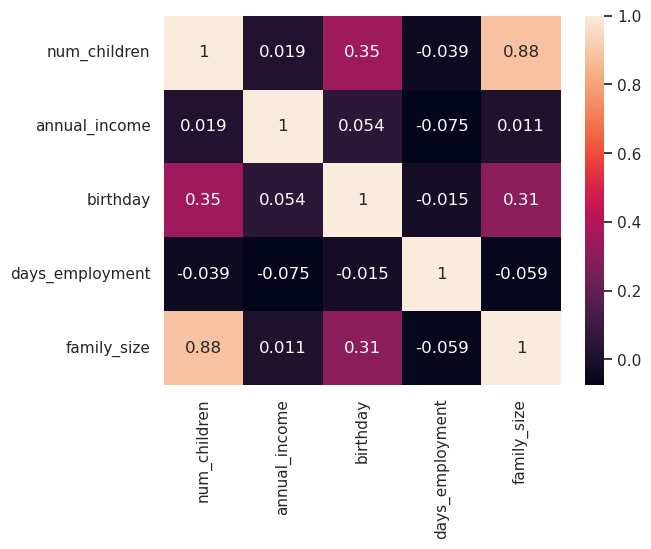

In [32]:
sns.heatmap(df1[numeric_features].corr(method='pearson'), annot=True)

**'num_children' and 'family_size' is highly correlated, so drop 'num_children'**

<AxesSubplot:>

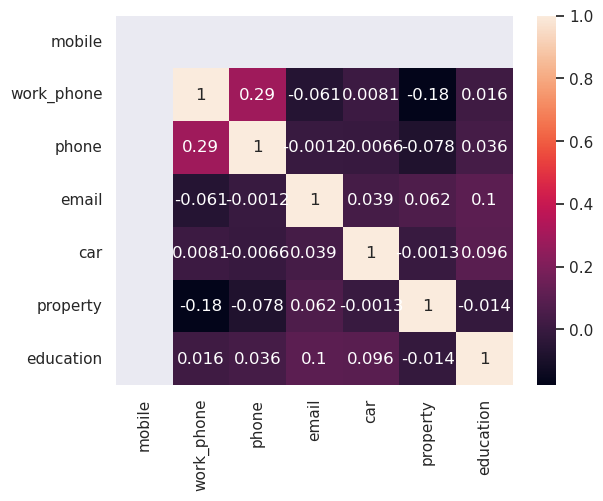

In [33]:
sns.heatmap(df1[cat_ordinal_features].corr(method='pearson'), annot=True)

In [26]:
df1['mobile'].unique()

array([1])

**'mobile' just has value of 1, so drop 'mobile'**

In [34]:
numeric_features.remove('num_children')
cat_ordinal_features.remove('mobile')

In [35]:
features = numeric_features + cat_ordinal_features + cat_dummy_features
#df1[features].to_csv('./data/df_features.csv')

# 3. Target

Vintage analysis is a widely used method for managing credit risk. It's a method for evaluating the credit quality.  
Choose users who **overdue for more than 60 days as the risk users** -- Target, labeled as 1.

0: 1-29 days past due  
1: 30-59 days past due  
2: 60-89 days overdue  
3: 90-119 days overdue  
4: 120-149 days overdue  
5: Overdue or bad debts, paid-offs for more than 150 days  
C: paid off that month  
X: No loan for the month

In [36]:
df2['status_label'] = None
df2.loc[df2.STATUS=='2', ['status_label']] = 1
df2.loc[df2.STATUS=='3', ['status_label']] = 1
df2.loc[df2.STATUS=='4', ['status_label']] = 1
df2.loc[df2.STATUS=='5', ['status_label']] = 1

In [37]:
#credit = pd.DataFrame({'start_month': df2.groupby('ID').MONTHS_BALANCE.min()})
#credit['end_month'] = df2.groupby('ID').MONTHS_BALANCE.max()
#credit['window'] = credit['end_month'] - credit['start_month']

df2_label = df2.groupby('ID').count()
df2_label['ID'] = df2_label.index
df2_label['window'] = df2.groupby('ID').MONTHS_BALANCE.max() - df2.groupby('ID').MONTHS_BALANCE.min()
df2_label.reset_index(drop=True, inplace=True)
df2_label.loc[df2_label.status_label>0, ['label']] = 1
df2_label.loc[df2_label.status_label==0, ['label']] = 0

Text(0.5, 1.0, 'Target distribution')

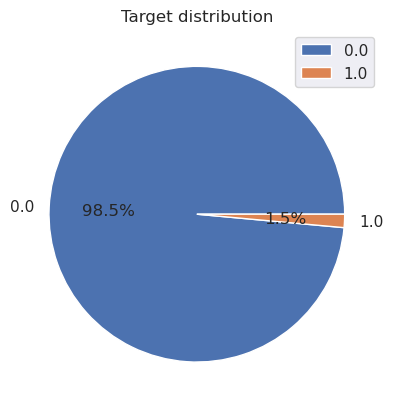

In [38]:
plt.pie(df2_label['label'].value_counts(),
        labels = df2_label['label'].value_counts().index, autopct='%1.1f%%')
plt.legend()
plt.title('Target distribution')

In [32]:
df2_label

,MONTHS_BALANCE,STATUS,status_label,ID,window,label
0,4,4,0,5001711,3,0.0
1,19,19,0,5001712,18,0.0
2,22,22,0,5001713,21,0.0
3,15,15,0,5001714,14,0.0
4,60,60,0,5001715,59,0.0
...,...,...,...,...,...,...
45980,18,18,0,5150482,17,0.0
45981,18,18,0,5150483,17,0.0
45982,13,13,0,5150484,12,0.0
45983,2,2,0,5150485,1,0.0


# 4. Combine features and target

In [39]:
df = pd.merge(df1, df2_label, how='left', on='ID')

In [40]:
df = df[features + ['label'] + ['ID'] + ['window']]

In [41]:
# save the new data
df.to_csv('./data/data_clean.csv', index=False)